<a href="https://colab.research.google.com/github/raineydavid/colab/blob/master/Pycoco_Demo_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/cocodataset/cocoapi 

fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [0]:
%%bash
wget http://images.cocodataset.org/zips/val2017.zip
unzip val2017.zip

--2019-05-15 16:29:02--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.9.67
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.9.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  45.2MB/s    in 18s     

2019-05-15 16:29:20 (43.9 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [0]:
%%bash
wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


--2019-05-15 16:34:31--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.97.51
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.97.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

     0K .......... .......... .......... .......... ..........  0%  382K 10m47s
    50K .......... .......... .......... .......... ..........  0% 2.36M 6m14s
   100K .......... .......... .......... .......... ..........  0% 1.08M 5m24s
   150K .......... .......... .......... .......... ..........  0% 72.7M 4m4s
   200K .......... .......... .......... .......... ..........  0%  773K 4m19s
   250K .......... .......... .......... .......... ..........  0%  127M 3m36s
   300K .......... .......... .......... .......... ..........  0%  204M 3m5s
   350K .......... .......... .......... .......... 

In [0]:
%%bash
cd cocoapi/PythonAPI

make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-2.7
creating build/temp.linux-x86_64-2.7/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -fno-strict-aliasing -Wdate-time -D_FORTIFY_SOURCE=2 -g -fdebug-prefix-map=/build/python2.7-3hk45v/python2.7-2.7.15~rc1=. -fstack-protector-strong -Wformat -Werror=format-security -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I../common -I/usr/include/python2.7 -c ../common/maskApi.c -o build/temp.linux-x86_64-2.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -fno-strict-aliasing -Wdate-time -D_FORTIFY_SOURCE=2 -g -fdebug-prefix-map=/build/python2.7-3hk45v/python2.7-2.7.15~rc1=. -fstack-protector-strong -Wformat -Werror=for

../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
                                                 ^
../common/maskApi.c: In function ‘rleFrPoly’:
../common/maskApi.c:166:3: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
   for(j=0; j<k; j++) x[j]=(int)(scale*xy[j*2+0]+.5); x[k]=x[0];
   ^~~
../common/maskApi.c:166:54: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   for(j=0; j<k; j++) x[j]=(int)(scale*xy[j*2+0]+.5); x[k]=x[0];
                                                      ^
../common/maskApi.c:167:3: warning: this ‘for’ clause does not guard... [-Wmisleading

In [0]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [0]:
!ls 

annotations		      ssd_mobilenet_v1_coco_2017_11_17
annotations_trainval2017.zip  ssd_mobilenet_v1_coco_2017_11_17.tar.gz
cocoapi			      val2017
models			      val2017.zip
sample_data


In [0]:
!ls annotations

captions_train2017.json   instances_val2017.json
captions_val2017.json	  person_keypoints_train2017.json
instances_train2017.json  person_keypoints_val2017.json


In [0]:
dataDir='.' #@param{type:'string'}
dataType='val2017'  #@param{type:'string'}
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [0]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.80s)
creating index...
index created!


In [0]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor food indoor appliance sports person animal vehicle furniture accessory electronic kitchen


In [0]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

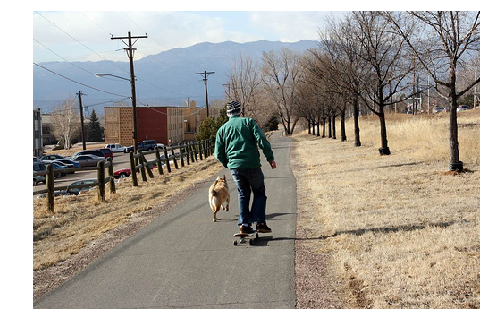

In [0]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

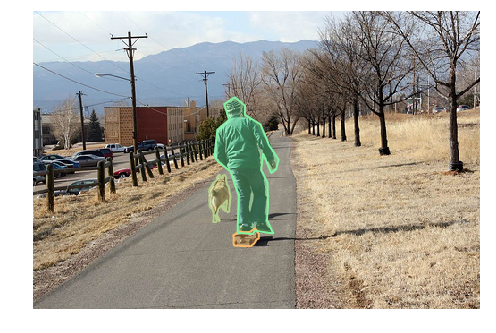

In [0]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [0]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


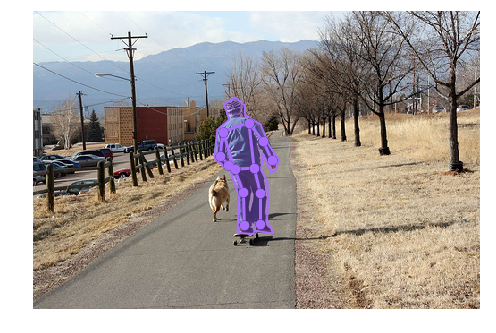

In [0]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [0]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


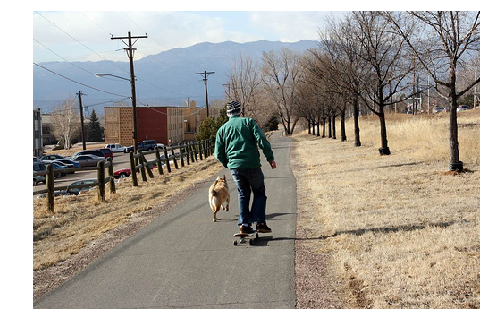

In [0]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()